# (1) Import of needed libraries

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import pos_tag

import gensim
from gensim import corpora

from gensim.models import TfidfModel
import numpy as np

from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

from gensim.models.ldamodel import LdaModel
from pprint import pprint

from gensim.models import HdpModel

# (2) Import of complaint data

In [2]:
df = pd.read_csv('complaints.csv',dtype = {'ZIP code': str})

pd.set_option('display.max_colwidth', None)

df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-11-19,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",TX,78541,Servicemember,NaN,Web,2022-11-19,In progress,Yes,NaN,6222374
1,2022-10-13,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,"In accordance with the fair credit reporting act XXXX account XXXX XXXX # XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Has violated my rights,15 U.S.C.1681 section 602 A states that I have a right to my privacy. 1 5 U.S.C. 1681 section 602 A section 2 states a consumer reporting company can not furnish an account without my written instructions which I have never given.",Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30043,NaN,Consent provided,Web,2022-10-13,Closed with explanation,Yes,NaN,6079679
2,2022-10-13,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,"This is not a duplicate nor is this complaint filed by a third party. I am filing this complaint myself. Please see this complaint is processed to the letter of the law. Again, I was going through my records & noticed the fraudulent accounts which do not belong to me STILL reposting on my file in Transunion. The other bureaus have already DELETED this fraudulent information so my question is why do you still report these damaging records? I also contacted XXXX XXXX XXXX and then talked to their staff, and they agreed to remove the accounts from my file. I have already disputed these accounts several times and stated that I am an identity theft victim. I even forwarded my FTC report I filed online on their website along with my personal information and documents but still, you chose to continue reporting these accounts. Credit Bureaus are bound to comply with the FCRA regulation section 605b but you never cared nor paid any attention to my Disputes. You became negligent of the FCRA law and continued reporting this information on my Credit File without Proper Verification or Investigation. Now, I want you to REMOVE these items from my file like the other bureaus have done. \n\nXXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX",Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90660,NaN,Consent provided,Web,2022-10-13,Closed with non-monetary relief,Yes,NaN,6076990
3,2022-10-12,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19148,NaN,Consent not provided,Web,2022-10-12,Closed with non-monetary relief,Yes,NaN,6080312
4,2022-11-19,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Na

# (3) Data Pre-Processing

## (3.1.a) Data Filtering (1/2)

Number of documents: 1164


<Axes: xlabel='Product'>

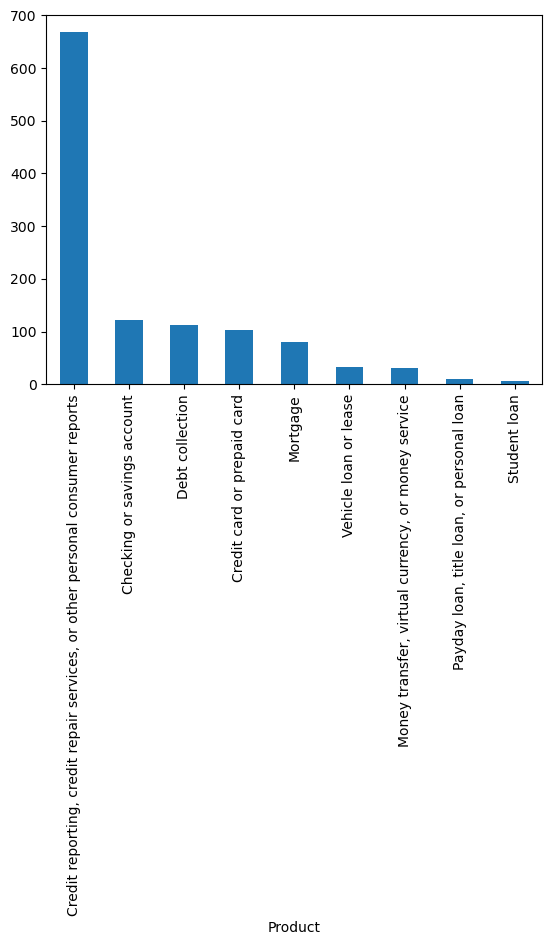

In [3]:
df = df[['Date received', 'Product','Consumer complaint narrative']]
df['Date received']= pd.to_datetime(df['Date received'])

df = df[df['Consumer complaint narrative'].notna()]

df = df[(df['Date received'].dt.year == 2022) & (df['Date received'].dt.month == 11)]

print("Number of documents:", len(df))

df['Product'].value_counts().plot(kind='bar')

## (3.1.b) Data Filtering (2/2)

In [4]:
df = df[(df['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports') ]
print("Number of documents:", len(df))

Number of documents: 668


## (3.2) Tokenization including removal of stopwords, capitalization & filtering on alphabetic data

In [5]:
stopwords = stopwords.words('english') + ["xx", "xxxx","im","please","xxxxxxxx"]

def tokenize (column):
    token_data = nltk.word_tokenize(column)
    return [w.lower() for w in token_data if w.lower() not in stopwords and w.isalpha() and len(w)>2]


df['token_data'] = df['Consumer complaint narrative'].apply(lambda x: tokenize(x))

df.head()

,Date received,Product,Consumer complaint narrative,token_data
86,2022-11-07,"Credit reporting, credit repair services, or other personal consumer reports",There were several inaccurate personal information in my credit report. I am having difficulties in getting them removed. It might be caused by fraud or error on credit reporting.,"[several, inaccurate, personal, information, credit, report, difficulties, getting, removed, might, caused, fraud, error, credit, reporting]"
261,2022-11-01,"Credit reporting, credit repair services, or other personal consumer reports","This is not a duplicate nor is this complaint filed by a third party. I am filing this complaint myself. Please see this complaint is processed to the letter of the law. Regardless of the multiple written requests, the unverified account listed below is still reporting on my credit report in violation of federal law. Under Section 609 ( a ) ( 1 ) ( A ) Disclosures to consumers [ 15 U.S.C. 1681g ] ( ( a ) Information on file ; sources ; report recipients. Experian shall, upon request, and subject to 610 ( a ) ( 1 ) [ 1681h ], clearly and accurately disclose to the consumer. If the consumer to whom the file relates requests that the first 5 digits of the social security number ( or similar identification number ) of the consumer not be included in the disclosure and the consumer reporting agency has received appropriate proof of the identity of the requester, the consumer reporting agency shall so truncate such number in such disclosure. & Section 611 ( a ) ( 1 ) ( A ) Procedure in case of disputed accuracy [ 15 U.S.C. 1681i ] ( a ) Reinvestigations of Disputed Information. If the completeness or accuracy of any item of information contained in my file at Experian is disputed by the consumer and the consumer notifies the agency directly, or indirectly through a creditor, the Bureaus shall, free of charge, conduct a reasonable reinvestigation to determine whether the disputed information is inaccurate and record the current status of the disputed information or delete the items from my file in accordance with paragraph ( 5 ), before the end of the 30-day period beginning on the date on which the agency receives the notice of the dispute from the consumer or creditor. The account below should be corrected ASAP : XXXX XXXX XXXX XXXXXXXX","[duplicate, complaint, filed, third, party, filing, complaint, see, complaint, processed, letter, law, regardless, multiple, written, requests, unverified, account, listed, still, reporting, credit, report, violation, federal, law, section, disclosures, consumers, information, file, sources, report, recipients, experian, shall, upon, request, subject, clearly, accurately, disclose, consumer, consumer, file, relates, requests, first, digits, social, security, number, similar, identification, number, consumer, included, disclosure, consumer, reporting, agency, received, appropriate, proof, identity, requester, consumer, reporting, agency, shall, truncate, number, disclosure, section, procedure, case, disputed, accuracy, reinvestigations, disputed, information, completeness, accuracy, item, information, contained, file, experian, disputed, consumer, consumer, notifies, agency, directly, indirectly, creditor, bureaus, shall, free, charge, ...]"
265,2022-11-05,"Credit reporting, credit repair services, or other personal consumer reports","My name is XXXX XXXX this complaint is not made in error neither is it being made by a third party.I declare under penalty of perjury I am alleging that a person or company- without my authorization- from unauthorized use of my social security number and card used my personal identifying information to apply for goods, services, or money ; and, was successful in creating some accounts. I have no knowledge of this and All is being investigated by the FTC.","[name, complaint, made, error, neither, made, third, declare, penalty, perjury, alleging, person, without, unauthorized, use, social, security, number,

## (3.3.a) Lemmatization (without POS)

In [6]:
#lm = WordNetLemmatizer()

#df['lemmatized_tokens'] = df['token_data'].apply(lambda token_list: [lm.lemmatize(token) for token in token_list])

#df.head()

## (3.3.b) Lemmatization (with POS)

In [7]:
#df['Pos_Tag'] = df['token_data'].apply(lambda token_list: nltk.pos_tag(token_list))

#def lemmatize_with_pos(token_list):
    #lemmatized_tokens = []
    #for token, tag in token_list:
        #if tag.startswith('N'):  # Noun
            #lemmatized_tokens.append(lm.lemmatize(token, 'n'))
        #elif tag.startswith('V'):  # Verb
            #lemmatized_tokens.append(lm.lemmatize(token, 'v'))
        #elif tag.startswith('R'):  # Adverb
            #lemmatized_tokens.append(lm.lemmatize(token, 'r'))
        #elif tag.startswith('J'):  # Adjective
            #lemmatized_tokens.append(lm.lemmatize(token, 'a'))
        #else:
            #lemmatized_tokens.append(lm.lemmatize(token))
    #return lemmatized_tokens

#df['lemmatized_pos_tokens'] = df['Pos_Tag'].apply(lambda token_list: lemmatize_with_pos(token_list))

#df.drop('Pos_Tag', axis=1)

#df.head()

## (3.3.c) Lemmatization (with POS) including only nouns and adjectives

In [8]:
#df['Pos_Tag'] = df['token_data'].apply(lambda token_list: nltk.pos_tag(token_list))

#def lemmatize_nouns_adjectives(token_list):
    #lemmatized_tokens = []
    #for token, tag in token_list:
        #if tag.startswith('N') or tag.startswith('J'):
            #lemmatized_tokens.append(lm.lemmatize(token, pos = 'a' if tag.startswith('J') else 'n'))
    #return lemmatized_tokens

#df['lemmatized_pos_tokens']=df['Pos_Tag'].apply(lambda token_list: lemmatize_nouns_adjectives(token_list))

#df.drop('Pos_Tag', axis =1)

#df.head()

## (3.3.d) Stemming including filtering on nouns + adjectives only

In [9]:
def pos_tagging (token_data):
    pos_tags = pos_tag(token_data)
    filtered_tokens = [word for word, pos in pos_tags if pos.startswith('N') or pos.startswith('J')]
    return filtered_tokens


def stemming (filtered_tokens):
    stemmer = PorterStemmer()
    tokens_stemmed = [stemmer.stem(word) for word in filtered_tokens]
    return tokens_stemmed

df['filtered_data']=df['token_data'].apply(pos_tagging)

df['stemmed_data']=df['filtered_data'].apply(stemming)

df.head()

,Date received,Product,Consumer complaint narrative,token_data,filtered_data,stemmed_data
86,2022-11-07,"Credit reporting, credit repair services, or other personal consumer reports",There were several inaccurate personal information in my credit report. I am having difficulties in getting them removed. It might be caused by fraud or error on credit reporting.,"[several, inaccurate, personal, information, credit, report, difficulties, getting, removed, might, caused, fraud, error, credit, reporting]","[several, inaccurate, personal, information, credit, report, difficulties, fraud, error, credit, reporting]","[sever, inaccur, person, inform, credit, report, difficulti, fraud, error, credit, report]"
261,2022-11-01,"Credit reporting, credit repair services, or other personal consumer reports","This is not a duplicate nor is this complaint filed by a third party. I am filing this complaint myself. Please see this complaint is processed to the letter of the law. Regardless of the multiple written requests, the unverified account listed below is still reporting on my credit report in violation of federal law. Under Section 609 ( a ) ( 1 ) ( A ) Disclosures to consumers [ 15 U.S.C. 1681g ] ( ( a ) Information on file ; sources ; report recipients. Experian shall, upon request, and subject to 610 ( a ) ( 1 ) [ 1681h ], clearly and accurately disclose to the consumer. If the consumer to whom the file relates requests that the first 5 digits of the social security number ( or similar identification number ) of the consumer not be included in the disclosure and the consumer reporting agency has received appropriate proof of the identity of the requester, the consumer reporting agency shall so truncate such number in such disclosure. & Section 611 ( a ) ( 1 ) ( A ) Procedure in case of disputed accuracy [ 15 U.S.C. 1681i ] ( a ) Reinvestigations of Disputed Information. If the completeness or accuracy of any item of information contained in my file at Experian is disputed by the consumer and the consumer notifies the agency directly, or indirectly through a creditor, the Bureaus shall, free of charge, conduct a reasonable reinvestigation to determine whether the disputed information is inaccurate and record the current status of the disputed information or delete the items from my file in accordance with paragraph ( 5 ), before the end of the 30-day period beginning on the date on which the agency receives the notice of the dispute from the consumer or creditor. The account below should be corrected ASAP : XXXX XXXX XXXX XXXXXXXX","[duplicate, complaint, filed, third, party, filing, complaint, see, complaint, processed, letter, law, regardless, multiple, written, requests, unverified, account, listed, still, reporting, credit, report, violation, federal, law, section, disclosures, consumers, information, file, sources, report, recipients, experian, shall, upon, request, subject, clearly, accurately, disclose, consumer, consumer, file, relates, requests, first, digits, social, security, number, similar, identification, number, consumer, included, disclosure, consumer, reporting, agency, received, appropriate, proof, identity, requester, consumer, reporting, agency, shall, truncate, number, disclosure, section, procedure, case, disputed, accuracy, reinvestigations, disputed, information, completeness, accuracy, item, information, contained, file, experian, disputed, consumer, consumer, notifies, agency, directly, indirectly, creditor, bureaus, shall, free, charge, ...]","[duplicate, complaint, third, party, filing, complaint, complaint, letter, law, multiple, requests, account, credit, report, violation, federal, law, section, consumers, information, file, sources, report, recipients, experian, request, subject, consumer, consumer, file, requests, social, security, number, similar, identification, number, consumer, disclosure, consumer, reporting, agency, appropriate, proof, identity, requester, consumer, reporting, agency, number, disclo

## (3.4) n-gram Implementation

In [10]:
def ngrams(text):
    bigram = gensim.models.Phrases(text)
    trigram = gensim.models.Phrases(bigram[text])
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    return [trigram_mod[bigram_mod[doc]] for doc in text]


df['stemmed_data']=df['stemmed_data'].apply(lambda x:[x])
df['ngrams']=df['stemmed_data'].apply(ngrams)

df['ngrams']=[item for sublist in df['ngrams'] for item in sublist]

df.head()

#def bigrams(text):
    #bigram = gensim.models.Phrases(text)
    #bigram_mod = gensim.models.phrases.Phraser(bigram)
    #return [bigram_mod[doc] for doc in text]

#df['stemmed_data']=df['stemmed_data'].apply(lambda x:[x])
#df['bigrams']=df['stemmed_data'].apply(bigrams)

#df['bigrams']=[item for sublist in df['bigrams'] for item in sublist]

#df.head()

,Date received,Product,Consumer complaint narrative,token_data,filtered_data,stemmed_data,ngrams
86,2022-11-07,"Credit reporting, credit repair services, or other personal consumer reports",There were several inaccurate personal information in my credit report. I am having difficulties in getting them removed. It might be caused by fraud or error on credit reporting.,"[several, inaccurate, personal, information, credit, report, difficulties, getting, removed, might, caused, fraud, error, credit, reporting]","[several, inaccurate, personal, information, credit, report, difficulties, fraud, error, credit, reporting]","[[sever, inaccur, person, inform, credit, report, difficulti, fraud, error, credit, report]]","[sever, inaccur, person, inform, credit, report, difficulti, fraud, error, credit, report]"
261,2022-11-01,"Credit reporting, credit repair services, or other personal consumer reports","This is not a duplicate nor is this complaint filed by a third party. I am filing this complaint myself. Please see this complaint is processed to the letter of the law. Regardless of the multiple written requests, the unverified account listed below is still reporting on my credit report in violation of federal law. Under Section 609 ( a ) ( 1 ) ( A ) Disclosures to consumers [ 15 U.S.C. 1681g ] ( ( a ) Information on file ; sources ; report recipients. Experian shall, upon request, and subject to 610 ( a ) ( 1 ) [ 1681h ], clearly and accurately disclose to the consumer. If the consumer to whom the file relates requests that the first 5 digits of the social security number ( or similar identification number ) of the consumer not be included in the disclosure and the consumer reporting agency has received appropriate proof of the identity of the requester, the consumer reporting agency shall so truncate such number in such disclosure. & Section 611 ( a ) ( 1 ) ( A ) Procedure in case of disputed accuracy [ 15 U.S.C. 1681i ] ( a ) Reinvestigations of Disputed Information. If the completeness or accuracy of any item of information contained in my file at Experian is disputed by the consumer and the consumer notifies the agency directly, or indirectly through a creditor, the Bureaus shall, free of charge, conduct a reasonable reinvestigation to determine whether the disputed information is inaccurate and record the current status of the disputed information or delete the items from my file in accordance with paragraph ( 5 ), before the end of the 30-day period beginning on the date on which the agency receives the notice of the dispute from the consumer or creditor. The account below should be corrected ASAP : XXXX XXXX XXXX XXXXXXXX","[duplicate, complaint, filed, third, party, filing, complaint, see, complaint, processed, letter, law, regardless, multiple, written, requests, unverified, account, listed, still, reporting, credit, report, violation, federal, law, section, disclosures, consumers, information, file, sources, report, recipients, experian, shall, upon, request, subject, clearly, accurately, disclose, consumer, consumer, file, relates, requests, first, digits, social, security, number, similar, identification, number, consumer, included, disclosure, consumer, reporting, agency, received, appropriate, proof, identity, requester, consumer, reporting, agency, shall, truncate, number, disclosure, section, procedure, case, disputed, accuracy, reinvestigations, disputed, information, completeness, accuracy, item, information, contained, file, experian, disputed, consumer, consumer, notifies, agency, directly, indirectly, creditor, bureaus, shall, free, charge, ...]","[duplicate, complaint, third, party, filing, complaint, complaint, letter, law, multiple, requests, account, credit, report, violation, federal, law, section, consumers, information, file, sources, report, recipients, experian, request, subject, consumer, consumer, file, requests, social, security, number, similar, identification, number, consumer, disclosure, consumer, r

## (3.5) Final pre-processed data

Top 50 most common words:
[('report', 1420), ('credit', 1299), ('account', 950), ('inform', 847), ('consum', 672), ('section', 388), ('item', 374), ('experian', 333), ('inquiri', 333), ('agenc', 326), ('bureau', 300), ('date', 273), ('file', 263), ('law', 236), ('letter', 219), ('compani', 218), ('person', 212), ('ident', 203), ('disput', 201), ('balanc', 187), ('state', 182), ('right', 170), ('payment', 168), ('inaccur', 158), ('complaint', 158), ('record', 153), ('theft', 153), ('creditor', 150), ('time', 144), ('usc', 142), ('day', 142), ('act', 139), ('request', 134), ('name', 134), ('violat', 131), ('number', 129), ('fcra', 127), ('address', 124), ('fair', 123), ('delet', 112), ('document', 109), ('furnish', 105), ('investig', 104), ('valid', 101), ('respons', 99), ('accord', 98), ('feder', 95), ('privaci', 94), ('card', 93), ('due', 88)]


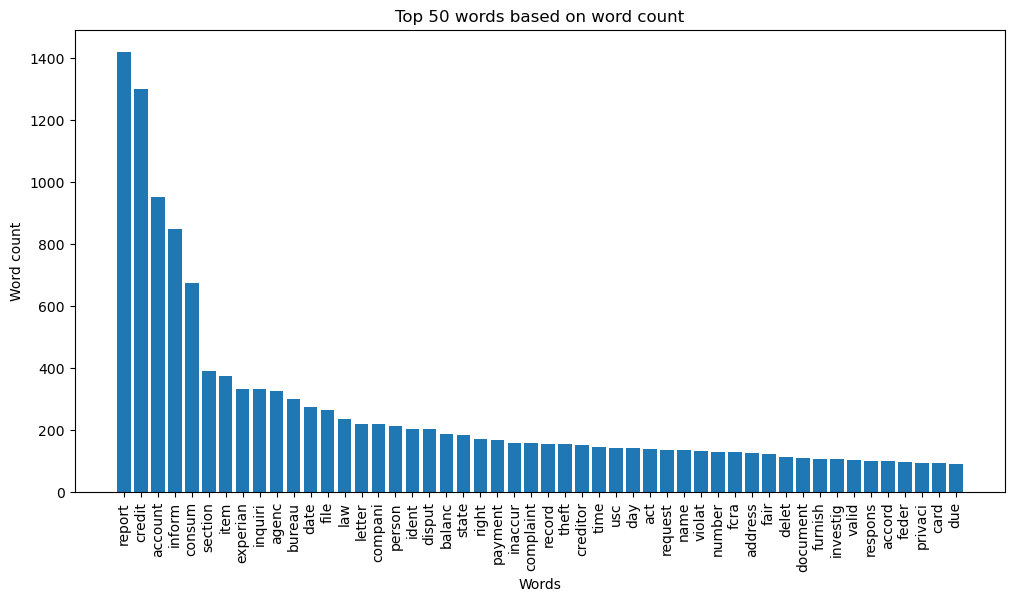

Top 50 words based on word count and their frequency:
{'report': 2.125748502994012, 'credit': 1.9446107784431137, 'account': 1.4221556886227544, 'inform': 1.2679640718562875, 'consum': 1.0059880239520957, 'section': 0.5808383233532934, 'item': 0.5598802395209581, 'experian': 0.49850299401197606, 'inquiri': 0.49850299401197606, 'agenc': 0.4880239520958084, 'bureau': 0.4491017964071856, 'date': 0.4086826347305389, 'file': 0.3937125748502994, 'law': 0.3532934131736527, 'letter': 0.3278443113772455, 'compani': 0.3263473053892216, 'person': 0.31736526946107785, 'ident': 0.30389221556886226, 'disput': 0.3008982035928144, 'balanc': 0.27994011976047906, 'state': 0.27245508982035926, 'right': 0.25449101796407186, 'payment': 0.25149700598802394, 'inaccur': 0.23652694610778444, 'complaint': 0.23652694610778444, 'record': 0.22904191616766467, 'theft': 0.22904191616766467, 'creditor': 0.2245508982035928, 'time': 0.2155688622754491, 'usc': 0.2125748502994012, 'day': 0.2125748502994012, 'act': 0.2080

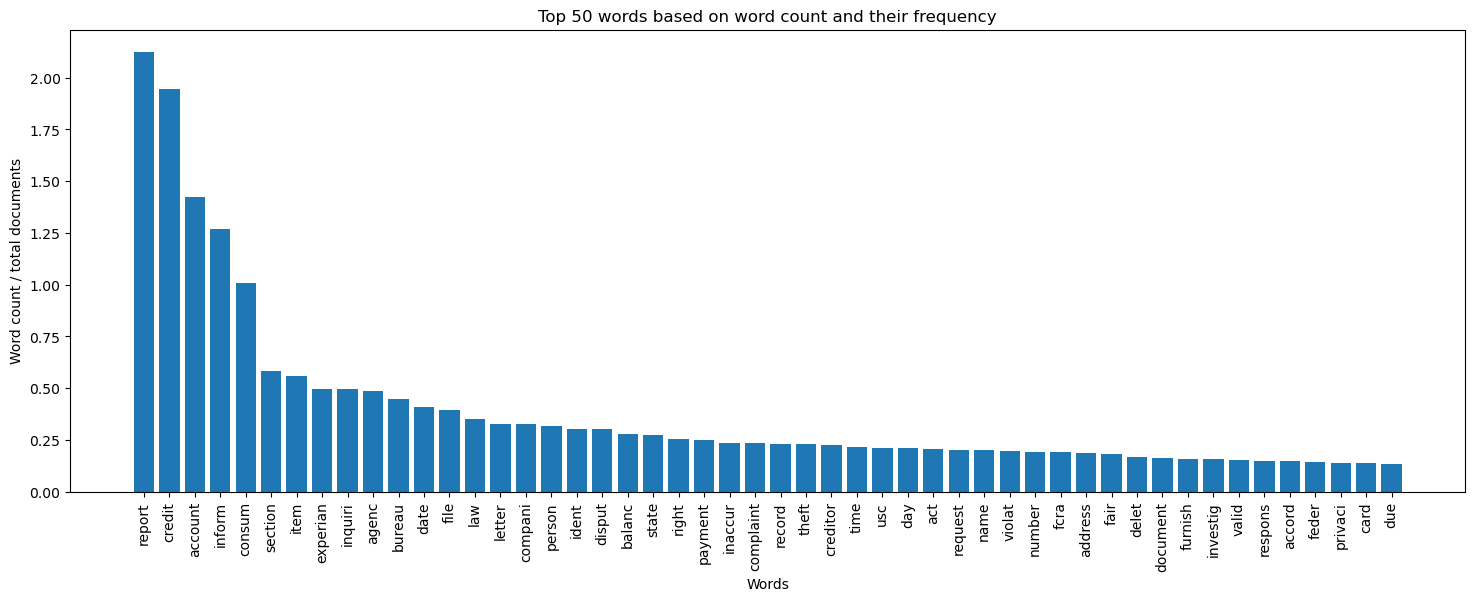

In [11]:
corpus_Top50 = df['ngrams'].tolist()

list_of_lists = [word for sublist in corpus_Top50 for word in sublist]

word_freq = FreqDist(list_of_lists)
top_50_words = dict(word_freq.most_common(50))

print("Top 50 most common words:")
print(word_freq.most_common(50))

plt.figure(figsize=(12,6))
plt.bar(top_50_words.keys(), top_50_words.values())
plt.xticks(rotation='vertical')
plt.title('Top 50 words based on word count')
plt.xlabel('Words')
plt.ylabel('Word count')
plt.show()

no_documents = len(df)

word_freq_share = {word: freq / no_documents for word, freq in top_50_words.items()}
print("Top 50 words based on word count and their frequency:")
print(word_freq_share)


plt.figure(figsize=(18,6))
plt.bar(list(word_freq_share.keys())[:50], list(word_freq_share.values())[:50])
plt.xticks(rotation='vertical')
plt.title('Top 50 words based on word count and their frequency')
plt.xlabel('Words')
plt.ylabel('Word count / total documents')
plt.show()

In [12]:
frequency_threshold = 0.5

tokenized_data = df['ngrams']

list_tokenized_data = df['ngrams'].tolist()
list_of_lists_full = [word for sublist in list_tokenized_data for word in sublist]

word_freq_full = FreqDist(list_of_lists_full)

words_full = dict(word_freq_full)

no_documents_full = len(df)

word_freq_share_full = {word: freq / no_documents_full for word, freq in words_full.items()}

filtered_data = [[word for word in doc if word_freq_share_full[word] <= frequency_threshold] for doc in tokenized_data]

# (4) Vectorization

## (4.1) BoW

In [13]:
corpus = filtered_data
dictionary = corpora.Dictionary(corpus)

dictionary.filter_extremes(no_below=10, no_above=0.95)

bow = [dictionary.doc2bow(text) for text in corpus] 

id_words_bow = [[(dictionary[id], count) for id, count in line] for line in bow]

print(id_words_bow[:5])

[[('error', 1), ('fraud', 1), ('inaccur', 1), ('person', 1), ('sever', 1)], [('inaccur', 1), ('accord', 1), ('accuraci', 2), ('agenc', 4), ('appropri', 1), ('case', 1), ('charg', 1), ('complaint', 3), ('complet', 1), ('conduct', 1), ('creditor', 2), ('current', 1), ('date', 1), ('delet', 1), ('determin', 1), ('disclosur', 2), ('disput', 1), ('end', 1), ('experian', 2), ('feder', 1), ('file', 5), ('free', 1), ('ident', 1), ('identif', 1), ('law', 2), ('letter', 1), ('multipl', 1), ('notifi', 1), ('number', 3), ('paragraph', 1), ('parti', 1), ('period', 1), ('procedur', 1), ('proof', 1), ('reason', 1), ('recipi', 1), ('record', 1), ('reinvestig', 2), ('request', 4), ('secur', 1), ('similar', 1), ('social', 1), ('sourc', 1), ('statu', 1), ('subject', 1), ('third', 1), ('violat', 1)], [('error', 1), ('person', 2), ('complaint', 1), ('number', 1), ('secur', 1), ('social', 1), ('third', 1), ('card', 1), ('declar', 1), ('ftc', 1), ('good', 1), ('identifi', 1), ('knowledg', 1), ('money', 1), (

## (4.2) TF-IDF 

In [14]:
tfidf_model = TfidfModel(dictionary=dictionary, smartirs='ntc')
tfidf = [tfidf_model[dictionary.doc2bow(text)] for text in corpus]

id_words_tfidf = [[(dictionary[id], np.around(freq,decimals=2)) for id, freq in line] for line in tfidf_model[bow]]

print(id_words_tfidf[:5])

[[('error', 0.56), ('fraud', 0.51), ('inaccur', 0.32), ('person', 0.31), ('sever', 0.48)], [('inaccur', 0.06), ('accord', 0.07), ('accuraci', 0.2), ('agenc', 0.2), ('appropri', 0.12), ('case', 0.12), ('charg', 0.12), ('complaint', 0.19), ('complet', 0.1), ('conduct', 0.12), ('creditor', 0.15), ('current', 0.11), ('date', 0.07), ('delet', 0.09), ('determin', 0.13), ('disclosur', 0.3), ('disput', 0.06), ('end', 0.11), ('experian', 0.11), ('feder', 0.08), ('file', 0.3), ('free', 0.14), ('ident', 0.07), ('identif', 0.12), ('law', 0.12), ('letter', 0.05), ('multipl', 0.11), ('notifi', 0.14), ('number', 0.25), ('paragraph', 0.13), ('parti', 0.09), ('period', 0.12), ('procedur', 0.13), ('proof', 0.08), ('reason', 0.1), ('recipi', 0.16), ('record', 0.08), ('reinvestig', 0.25), ('request', 0.32), ('secur', 0.11), ('similar', 0.15), ('social', 0.11), ('sourc', 0.14), ('statu', 0.11), ('subject', 0.12), ('third', 0.1), ('violat', 0.08)], [('error', 0.22), ('person', 0.24), ('complaint', 0.13), ('

# (5) Topic Modeling

## (5.1) Latent Semantic Analysis (LSA) / Latent Semantic Indexing (LSI) with BoW

Coherence score with 2 clusters: 0.40232116157322184
Coherence score with 3 clusters: 0.46093594540233607
Coherence score with 4 clusters: 0.5305162201708699
Coherence score with 5 clusters: 0.48654307706414246
Coherence score with 6 clusters: 0.4986492368870917
Coherence score with 7 clusters: 0.5236806533710723
Coherence score with 8 clusters: 0.5133523572180754
Coherence score with 9 clusters: 0.5350669760173878
Coherence score with 10 clusters: 0.4863568548629383
Coherence score with 11 clusters: 0.5103795644925655
Coherence score with 12 clusters: 0.4898468153543667
Coherence score with 13 clusters: 0.46373637705813764
Coherence score with 14 clusters: 0.4556263409654236
Coherence score with 15 clusters: 0.47838801537566267
Coherence score with 16 clusters: 0.449580205786127
Coherence score with 17 clusters: 0.46179048286730456
Coherence score with 18 clusters: 0.4392940419398263
Coherence score with 19 clusters: 0.4491798124994978
Coherence score with 20 clusters: 0.4284761945718

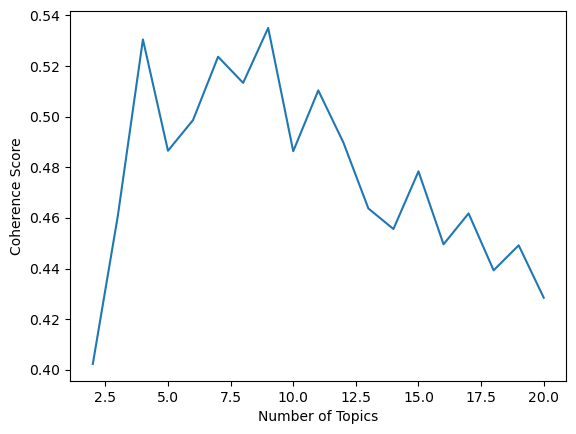

9


In [15]:
df['Assigned_topic_lsi_bow'] = None
df['Topic_score_lsi_bow'] = None


topics = []
score=[]

for i in range(2,21):
    lsi = LsiModel(bow, num_topics = i, id2word = dictionary, power_iters=10)
    coherence_model = CoherenceModel(model=lsi, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score))
    
    topics.append(i)
    score.append(coherence_model.get_coherence())
    
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

topic_score_dict = dict(zip(topics, score))
max_dict = max(zip(topic_score_dict.values(),topic_score_dict.keys()))[1]
print(max_dict)

In [16]:
lsi_bow = LsiModel(bow, num_topics=max_dict, id2word=dictionary,power_iters=5)

for topic_num, words in lsi_bow.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.892*"inquiri" + 0.440*"date" + 0.030*"unauthor" + 0.029*"bureau" + 0.029*"consent" + 0.026*"experian" + 0.021*"letter" + 0.020*"investig" + 0.020*"delet" + 0.019*"number".
Words in 1: 0.313*"experian" + 0.276*"file" + 0.253*"agenc" + 0.252*"law" + 0.207*"bureau" + 0.181*"disput" + 0.172*"ident" + 0.163*"state" + 0.158*"request" + 0.143*"record".
Words in 2: 0.320*"experian" + -0.291*"ident" + 0.255*"last" + -0.220*"theft" + 0.213*"activ" + 0.198*"delet" + -0.194*"file" + 0.186*"differ" + -0.181*"agenc" + 0.177*"request".
Words in 3: -0.283*"date" + -0.233*"last" + 0.232*"experian" + 0.230*"person" + -0.200*"term" + 0.195*"right" + -0.194*"activ" + 0.191*"usc" + -0.187*"balanc" + -0.183*"differ".
Words in 4: -0.512*"experian" + 0.278*"payment" + 0.242*"agenc" + 0.235*"person" + 0.230*"state" + -0.226*"disput" + 0.220*"usc" + -0.192*"law" + 0.142*"privaci" + -0.139*"file".
Words in 5: -0.424*"agenc" + 0.288*"payment" + 0.270*"compani" + 0.213*"due" + -0.196*"date" + -0.163*

## (5.2) Latent Semantic Analysis (LSA) / Latent Semantic Indexing (LSI) with Tf-Idf

Coherence score with 2 clusters: 0.4546234196495621
Coherence score with 3 clusters: 0.3910316773008808
Coherence score with 4 clusters: 0.5137004152052136
Coherence score with 5 clusters: 0.4744568813408277
Coherence score with 6 clusters: 0.4191584101174528
Coherence score with 7 clusters: 0.39626656573166086
Coherence score with 8 clusters: 0.46313726268765787
Coherence score with 9 clusters: 0.3980578960731191
Coherence score with 10 clusters: 0.4258123507718333
Coherence score with 11 clusters: 0.3655307926985591
Coherence score with 12 clusters: 0.4215151322431909
Coherence score with 13 clusters: 0.342116486931366
Coherence score with 14 clusters: 0.39142238046432654
Coherence score with 15 clusters: 0.37054803203859044
Coherence score with 16 clusters: 0.38899573844993884
Coherence score with 17 clusters: 0.3767397123407933
Coherence score with 18 clusters: 0.3991365917482487
Coherence score with 19 clusters: 0.3571199365031515
Coherence score with 20 clusters: 0.35886443477919

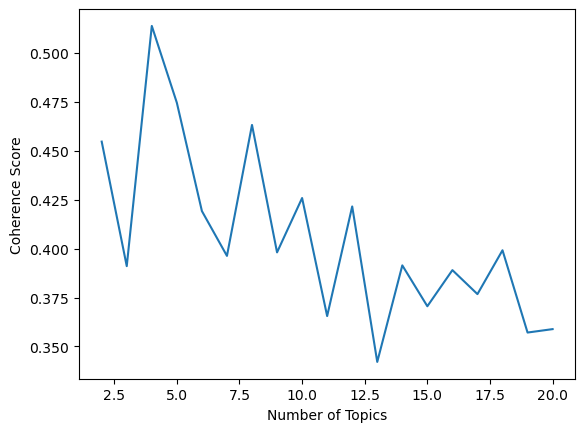

4
Words in 0: 0.239*"agenc" + 0.201*"state" + 0.188*"right" + 0.177*"privaci" + 0.169*"furnish" + 0.169*"usc" + 0.166*"act" + 0.161*"instruct" + 0.159*"fair" + 0.159*"experian".
Words in 1: 0.295*"privaci" + 0.289*"instruct" + 0.274*"furnish" + 0.250*"state" + 0.238*"right" + 0.224*"accord" + 0.218*"fair" + 0.214*"act" + -0.186*"inquiri" + 0.175*"agenc".
Words in 2: 0.766*"inquiri" + 0.245*"hard" + 0.217*"unauthor" + 0.176*"compani" + -0.131*"balanc" + -0.127*"ident" + -0.118*"theft" + -0.118*"law" + -0.115*"file" + -0.087*"valid".
Words in 3: 0.302*"letter" + 0.295*"name" + 0.291*"involv" + 0.289*"gotten" + 0.275*"review" + 0.263*"sure" + 0.256*"third" + 0.241*"mail" + 0.229*"respons" + 0.200*"parti".


In [18]:
topics_LSI_tfidf = []
score_LSI_tfidf=[]

for i in range(2,21):
    lsi_tfidf = LsiModel(tfidf, num_topics = i, id2word = dictionary, power_iters = 10)
    coherence_model_tfidf = CoherenceModel(model=lsi_tfidf, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score_tfidf = coherence_model_tfidf.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_tfidf))
    
    topics_LSI_tfidf.append(i)
    score_LSI_tfidf.append(coherence_model_tfidf.get_coherence())
    
_=plt.plot(topics_LSI_tfidf, score_LSI_tfidf)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

topic_score_dict_tfidf = dict(zip(topics_LSI_tfidf, score_LSI_tfidf))
max_dict_tfidf = max(zip(topic_score_dict_tfidf.values(),topic_score_dict_tfidf.keys()))[1]
print(max_dict_tfidf)

lsi_tfidf = LsiModel(tfidf, num_topics=max_dict_tfidf, id2word=dictionary,power_iters=10)

for topic_num, words in lsi_tfidf.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

In [19]:
lsi_tfidf = LsiModel(tfidf, num_topics=max_dict_tfidf, id2word=dictionary,power_iters=10)

for topic_num, words in lsi_tfidf.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.239*"agenc" + 0.201*"state" + 0.188*"right" + 0.177*"privaci" + 0.169*"furnish" + 0.169*"usc" + 0.166*"act" + 0.161*"instruct" + 0.159*"fair" + 0.159*"experian".
Words in 1: 0.295*"privaci" + 0.289*"instruct" + 0.274*"furnish" + 0.250*"state" + 0.238*"right" + 0.224*"accord" + 0.218*"fair" + 0.214*"act" + -0.186*"inquiri" + 0.175*"agenc".
Words in 2: -0.766*"inquiri" + -0.245*"hard" + -0.217*"unauthor" + -0.176*"compani" + 0.131*"balanc" + 0.127*"ident" + 0.118*"theft" + 0.118*"law" + 0.115*"file" + 0.087*"valid".
Words in 3: 0.302*"letter" + 0.295*"name" + 0.291*"involv" + 0.289*"gotten" + 0.275*"review" + 0.263*"sure" + 0.256*"third" + 0.241*"mail" + 0.229*"respons" + 0.200*"parti".


## (5.3) Latent Dirichlet Allocation (LDA) with BoW

Coherence score with 2 clusters: 0.37735081758709205
Coherence score with 3 clusters: 0.3794914898725181
Coherence score with 4 clusters: 0.4207950549249358
Coherence score with 5 clusters: 0.4777816528590166
Coherence score with 6 clusters: 0.40931499723939074
Coherence score with 7 clusters: 0.41945210210554196
Coherence score with 8 clusters: 0.44236255935964425
Coherence score with 9 clusters: 0.4609257297457444
Coherence score with 10 clusters: 0.46062497065282815
Coherence score with 11 clusters: 0.4193634312087155
Coherence score with 12 clusters: 0.42979769273681767
Coherence score with 13 clusters: 0.426916479907658
Coherence score with 14 clusters: 0.40755247754321544
Coherence score with 15 clusters: 0.4238386424804842
Coherence score with 16 clusters: 0.4304955364280194
Coherence score with 17 clusters: 0.45372805952267103
Coherence score with 18 clusters: 0.43992898281185366
Coherence score with 19 clusters: 0.40012236268012763
Coherence score with 20 clusters: 0.418774571

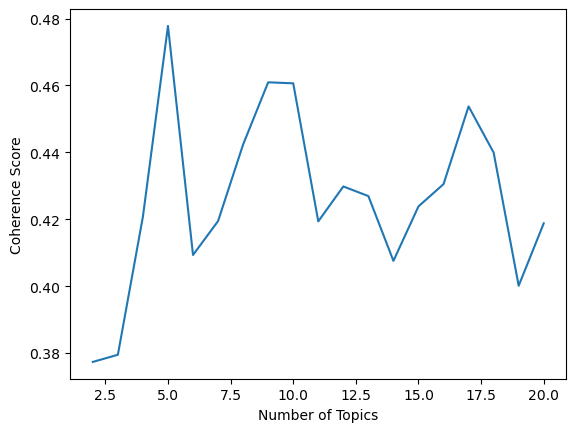

5


In [20]:
topics_LDA_bow = []
score_LDA_bow=[]

for i in range(2,21):
    lda_bow = LdaModel(corpus=bow,id2word=dictionary, num_topics = i, iterations = 100)
    coherence_model_lda_bow = CoherenceModel(model=lda_bow, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score_lda_bow = coherence_model_lda_bow.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_lda_bow))
    
    topics_LDA_bow.append(i)
    score_LDA_bow.append(coherence_model_lda_bow.get_coherence())
    
_=plt.plot(topics_LDA_bow, score_LDA_bow)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

topic_score_dict_lda_bow = dict(zip(topics_LDA_bow, score_LDA_bow))
max_dict_lda_bow = max(zip(topic_score_dict_lda_bow.values(),topic_score_dict_lda_bow.keys()))[1]
print(max_dict_lda_bow)

In [21]:
lda_bow = LdaModel(corpus=bow,id2word=dictionary, num_topics = max_dict_lda_bow, iterations = 100)

for topic_num, words in lda_bow.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.032*"experian" + 0.028*"agenc" + 0.028*"file" + 0.026*"bureau" + 0.023*"record" + 0.023*"law" + 0.020*"disput" + 0.020*"request" + 0.019*"ident" + 0.015*"day".
Words in 1: 0.061*"inquiri" + 0.031*"date" + 0.028*"compani" + 0.024*"bureau" + 0.024*"person" + 0.023*"agenc" + 0.021*"letter" + 0.018*"state" + 0.017*"name" + 0.016*"law".
Words in 2: 0.022*"agenc" + 0.020*"experian" + 0.017*"ident" + 0.016*"disput" + 0.016*"file" + 0.016*"theft" + 0.016*"balanc" + 0.015*"letter" + 0.015*"act" + 0.014*"fcra".
Words in 3: 0.032*"payment" + 0.028*"usc" + 0.022*"date" + 0.022*"inquiri" + 0.020*"bureau" + 0.019*"creditor" + 0.018*"late" + 0.017*"experian" + 0.016*"inaccur" + 0.015*"last".
Words in 4: 0.040*"experian" + 0.026*"record" + 0.023*"bureau" + 0.023*"law" + 0.023*"ident" + 0.022*"file" + 0.017*"research" + 0.016*"balanc" + 0.015*"belong" + 0.014*"time".


## (5.4) Latent Dirichlet Allocation (LDA) with Tf-Idf

Coherence score with 2 clusters: 0.45164189046676106
Coherence score with 3 clusters: 0.36012584264608744
Coherence score with 4 clusters: 0.39430432386288483
Coherence score with 5 clusters: 0.3405507161347937
Coherence score with 6 clusters: 0.31132276051241264
Coherence score with 7 clusters: 0.36808420093470634
Coherence score with 8 clusters: 0.39523953070959117
Coherence score with 9 clusters: 0.33170264454801385
Coherence score with 10 clusters: 0.32718902922818116
Coherence score with 11 clusters: 0.3326750834445463
Coherence score with 12 clusters: 0.36336638009673955
Coherence score with 13 clusters: 0.3335455452449281
Coherence score with 14 clusters: 0.33256635704406723
Coherence score with 15 clusters: 0.32873429013427785
Coherence score with 16 clusters: 0.3506628277773551
Coherence score with 17 clusters: 0.3333848323403234
Coherence score with 18 clusters: 0.3405181536337593
Coherence score with 19 clusters: 0.31993870500217925
Coherence score with 20 clusters: 0.333925

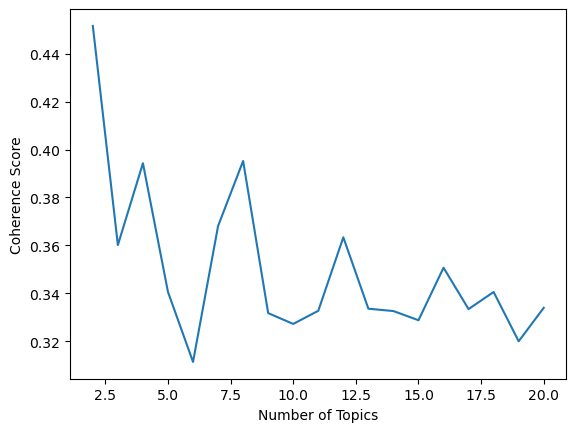

2


In [22]:
topics_LDA_tfidf = []
score_LDA_tfidf=[]

for i in range(2,21):
    lda_tfidf = LdaModel(corpus=tfidf,id2word=dictionary, num_topics = i, iterations = 100)
    coherence_model_lda_tfidf = CoherenceModel(model=lda_tfidf, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score_lda_tfidf = coherence_model_lda_tfidf.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_lda_tfidf))
    
    topics_LDA_tfidf.append(i)
    score_LDA_tfidf.append(coherence_model_lda_tfidf.get_coherence())
    
_=plt.plot(topics_LDA_tfidf, score_LDA_tfidf)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

topic_score_dict_lda_tfidf = dict(zip(topics_LDA_tfidf, score_LDA_tfidf))
max_dict_lda_tfidf = max(zip(topic_score_dict_lda_tfidf.values(),topic_score_dict_lda_tfidf.keys()))[1]
print(max_dict_lda_tfidf)

In [23]:
lda_tfidf = LdaModel(corpus=tfidf,id2word=dictionary, num_topics = max_dict_lda_tfidf, iterations = 100)

for topic_num, words in lda_tfidf.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.018*"inquiri" + 0.014*"agenc" + 0.012*"letter" + 0.012*"right" + 0.012*"state" + 0.011*"experian" + 0.011*"file" + 0.010*"bureau" + 0.010*"date" + 0.010*"disput".
Words in 1: 0.013*"experian" + 0.013*"balanc" + 0.013*"address" + 0.012*"compani" + 0.012*"inaccur" + 0.011*"bureau" + 0.010*"payment" + 0.010*"inquiri" + 0.009*"law" + 0.009*"valid".


## (5.5) Hierarchical Dirichlet Process (HDP) with BoW

In [24]:
hdp_bow = HdpModel(corpus=bow,id2word=dictionary)

for topic_num, words in hdp_bow.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))
    
no_topics = topic_num

Words in 0: 0.017*act + 0.014*permiss + 0.014*fair + 0.013*notifi + 0.012*send + 0.012*access + 0.012*licens + 0.012*investig + 0.012*unknown + 0.012*anyth.
Words in 1: 0.018*origin + 0.015*point + 0.012*paragraph + 0.012*law + 0.011*mail + 0.011*complaint + 0.011*servic + 0.011*multipl + 0.011*differ + 0.011*inaccuraci.
Words in 2: 0.017*point + 0.014*good + 0.014*sure + 0.013*state + 0.013*secur + 0.012*languag + 0.011*legal + 0.011*perjuri + 0.011*certifi + 0.011*awar.
Words in 3: 0.022*file + 0.017*data + 0.015*notifi + 0.014*ident + 0.014*lawyer + 0.014*doubt + 0.013*fee + 0.013*question + 0.013*attorney + 0.012*polic.
Words in 4: 0.018*fact + 0.014*will + 0.013*care + 0.013*attach + 0.013*minimum + 0.012*amount + 0.012*person + 0.011*fals + 0.011*confidenti + 0.011*issu.
Words in 5: 0.027*phone + 0.016*sure + 0.015*use + 0.015*recent + 0.014*receipt + 0.013*purpos + 0.013*sent + 0.013*respond + 0.013*amount + 0.013*identifi.
Words in 6: 0.023*person + 0.016*fraud + 0.014*hello + 

In [25]:
coherence_model_hdp_bow = CoherenceModel(model=hdp_bow, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
coherence_score_hdp_bow = coherence_model_hdp_bow.get_coherence()
print('Coherence score with {} clusters: {}'.format(no_topics, coherence_score_hdp_bow))

Coherence score with 19 clusters: 0.38608837400226664


## (5.6) Hierarchical Dirichlet Process (HDP) with Tf-Idf

In [26]:
hdp_tfidf = HdpModel(corpus=tfidf,id2word=dictionary)

for topic_num, words in hdp_tfidf.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.025*product + 0.019*histori + 0.015*stickler + 0.013*instruct + 0.013*inquiri + 0.013*reason + 0.012*incomplet + 0.012*provid + 0.012*will + 0.012*none.
Words in 1: 0.018*profil + 0.017*understand + 0.014*due + 0.014*advers + 0.013*term + 0.013*cfpb + 0.012*alleg + 0.011*servic + 0.011*anyon + 0.011*belong.
Words in 2: 0.018*local + 0.017*ident + 0.014*contract + 0.014*life + 0.013*recent + 0.013*peopl + 0.013*will + 0.012*agenc + 0.012*fraud + 0.012*amount.
Words in 3: 0.018*anyth + 0.018*game + 0.017*give + 0.016*failur + 0.013*applic + 0.012*regul + 0.012*author + 0.012*score + 0.011*open + 0.011*fraud.
Words in 4: 0.018*anyon + 0.018*purpos + 0.017*didnt + 0.016*term + 0.015*home + 0.014*process + 0.014*penalti + 0.013*ftc + 0.013*hour + 0.012*mortgag.
Words in 5: 0.018*procedur + 0.017*reinvestig + 0.017*compani + 0.014*convict + 0.014*request + 0.013*investig + 0.012*data + 0.012*complet + 0.011*crime + 0.010*cfpb.
Words in 6: 0.020*matter + 0.020*give + 0.014*live 

In [27]:
coherence_model_hdp_tfidf = CoherenceModel(model=hdp_tfidf, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
coherence_score_hdp_tfidf = coherence_model_hdp_tfidf.get_coherence()
print('Coherence score with {} clusters: {}'.format(no_topics, coherence_score_hdp_tfidf))

Coherence score with 19 clusters: 0.3973387943620849
